This section of the notes is intended for follow-up after the class and future reference. We will not go through this in detail in the teaching sessions.

This material and the exercises are more advanced than in the main notes. You are not *required* to do these, but may like to do so if you want to stretch yourself. 

## A2.1 Binary Operators

### A2.1.1 Basic Logic

Quite often (data masks in data products, being the most typical example), you will need to deal with binary numbers and binary operations, so we will introduce the concepts you need here.

We came across *logical* or *Boolean* operations in the main session (with the data type `bool`). In logic, something can be `True` or `False`, and operations such as [`not`](http://en.wikipedia.org/wiki/Logical_NOT), [`and`](http://en.wikipedia.org/wiki/Logical_AND) and [`or`](http://en.wikipedia.org/wiki/Logical_OR) have quite obvious meanings. More generally in logic (and electronics) we may come across other logical operators such as [`nand`](http://en.wikipedia.org/wiki/Logical_NAND) (`not and`) and [`nor`](http://en.wikipedia.org/wiki/Logical_NOR) (`not or`) and [`xor`](http://en.wikipedia.org/wiki/Logical_XOR) (exclusive `or`: *either but not both*), but these are not defined in Python (they can of course be *derived* though).

You should first make sure that you understand the results of the `and`, `or` and `not` `bool` operators:

In [1]:
print('False and False =',False and False)
print('False and True  =',False and True)
print('True  and False =',True and False)
print('True  and True  =',True and True)

False and False = False
False and True  = False
True  and False = False
True  and True  = True


In [2]:
print('False or False =',False or False)
print('False or True  =',False or True)
print('True  or False =',True or False)
print('True  or True  =',True or True)

False or False = False
False or True  = True
True  or False = True
True  or True  = True


In [3]:
print('not False =',not False)
print('not True  =',not True)

not False = True
not True  = False


### Exercise A2.1

As an exercise for this, you could see if you can simulate the logical combinations `xor`, `nor` and `nand`, e.g.:

In [1]:
# nand test:
# see http://en.wikipedia.org/wiki/Logical_NAND
# (A nand B) is not (A and B)

ABList = [(False,False),(False,True),(True,False),(True,True)]
for A,B in ABList:
    print('%s nand %s  ='%(str(A),str(B)),not (A and B))

False nand False  = True
False nand True  = True
True nand False  = True
True nand True  = False


### A2.1.2 Binary

### Endianness

It is of value to have some understanding of binary operations and representation(s):

- you will come across these in encoded data products (such as the QA information in MODIS and other satellite products) as it is a more efficient way of enconding multiple sets of logical information  
- this is the form in which the computer ultimately stores and processes information, so it is useful to have some appreciation of that  
- you will sometimes need to consider how large a number representation is (e.g. byte or short integer or long integer) as this can impact computer memory and storage requirements  
- you may come across different binary representations for different datasets

There are two main number representations used in computing, which depend on the interpretation of the  [MSB](http://en.wikipedia.org/wiki/Most_significant_bit), Most Significant Bit or 'high bit order' (or Byte) and [LSB](http://en.wikipedia.org/wiki/Least_significant_bit), Least Significant Bit or 'low bit order' (or Byte). 

Which system is used is sometimes refered to as ['endianness'](http://en.wikipedia.org/wiki/Endianness) so we may refer to a 'big-endian' or 'little-endian' representation. In a big-endian representation, the left-most byte represents the highest number. In a little-endian system, this is the lowest number.

It is probably easiest to understand this with decimal numbers:

So, in a big-endian decimal representation:

    152
    
represents one hundred and fifty two (`(1 x 10^2) + (5 x 10^1) + (2 x 10^0)`)

In a little-endian system, this is interpreted the other way around, so `152` is `(2 x 10^2) + (5 x 10^1) + (1 x 10^0)`, so is actually two hundred and fifty one.

The term comes from Jonathan Swift's [Gulliver's travels](http://www.gutenberg.org/files/829/829-h/829-h.htm), if you are interested, refering to the which end of an egg the people of Lilliput and Blefuscu believe you should open:

``"(The people of Lilliput and Blefuscu have) been engaged in a most obstinate war for six-and-thirty moons past.  It began upon the following occasion.  It is allowed on all hands, that the primitive way of breaking eggs, before we eat them, was upon the larger end; but his present majesty’s grandfather, while he was a boy, going to eat an egg, and breaking it according to the ancient practice, happened to cut one of his fingers.  Whereupon the emperor his father published an edict, commanding all his subjects, upon great penalties, to break the smaller end of their eggs.  The people so highly resented this law, that our histories tell us, there have been six rebellions raised on that account; wherein one emperor lost his life, and another his crown.  These civil commotions were constantly fomented by the monarchs of Blefuscu; and when they were quelled, the exiles always fled for refuge to that empire.  It is computed that eleven thousand persons have at several times suffered death, rather than submit to break their eggs at the smaller end.  Many hundred large volumes have been published upon this controversy: but the books of the Big-endians have been long forbidden, and the whole party rendered incapable by law of holding employments."``


Endianness then (like which end of an egg you should break), is ultimately arbitrary, but we must still have conventions so that information on one computer system can be interpreted by another.

At present, probably most computers you use will be little-endian (the 'Intel convention' as it has come to be known), but you may also come across data stored in big-endian (so-called 'Motorola convention') format. 

Endianness is mainly implemented at the byte level, so if you are considering a signle byte, which 'end you open the egg' has no consequence.

For longer number representations though (e.g. a 2-byte or 4-byte integer) it can have significant consequences, and you need to be aware of the endianness of data that you might try to be reading. Many file formats will explicitly store the endinaness that data were written in, so a correct interpretation will be handled by low level reading routines. But, if you get binary data that are of more than one byte that look rather odd when you display them, one possible reason is that you have assumed a different endinaness to what the data were written in.


### Binary numbers

When we are working with *binary* numbers *for a single bit*, we represent `False` by `0` and `True` by `1`.

In Python, these representations can essentially be used interchangably with logical operators, (but we use the function `bool()` to convert to a boolean representation)

In [5]:
print(True or False)

True


In [6]:
print(1 or 0)

1


In [7]:
print(bool(1 or 0))

True


In [8]:
whatTheySay = True

if whatTheySay:
    print("it's true what they say ...")
else:
    print("it's not true what they say ...")

it's true what they say ...


In [9]:
whatTheySay = 1

if whatTheySay:
    print("it's true what they say ...")
else:
    print("it's not true what they say ...")

it's true what they say ...


A binary representation of a number is a representation in [base 2](http://en.wikipedia.org/wiki/Binary_number), where we may use multiple [bits](http://en.wikipedia.org/wiki/Bit) to represent numbers.

Some number representations (such as [floating point](http://en.wikipedia.org/wiki/IEEE_floating_point)) are stored in a more complicated manner, but [ASCII codes](http://www.asciitable.com/) for string representation and integers are in a more straightforward binary format.

So, e.g. the (integer) **decimal** number 3 is `11` in binary (base 2):

In [10]:
3 == (1 * 2**1) + \
     (1 * 2**0)

True

We can use the Python function `bin()` to get this more directly:

In [11]:
print(bin(3))

0b11


In [12]:
print(0b11)

3


Similarly, the decimal number `101` is `1100101` in binary:

In [13]:
101 ==  (1 * 2**6) + \
        (1 * 2**5) + \
        (0 * 2**4) + \
        (0 * 2**3) + \
        (1 * 2**2) + \
        (0 * 2**1) + \
        (1 * 2**0)

True

In [14]:
print(bin(101))

0b1100101


### Exercise A2.2

a. Work out what the following decimal numbers are in binary:

    7  
    493  
    127    
    255  
    1024  

  and check your result using the approach we took to confirming `101`:

    101 ==  (1 * 2**6) + \
            (1 * 2**5) + \
            (0 * 2**4) + \
            (0 * 2**3) + \
            (1 * 2**2) + \
            (0 * 2**1) + \
            (1 * 2**0)
        
b. How many bits are needed to represent each of these numbers?

c. What is the largest number you could represent in: (i) a 32 bit representation; (b) a 64 bit representation?

d. Recalling that there are 8 bits in a [byte](http://en.wikipedia.org/wiki/Byte), what is the largest number you could represent in: (a) a single byte; (b) two bytes? 

In [15]:
'''
    Explorations in binary!

    We can represent:
   
    binary numbers, e.g.    0b010101
    octal numbers, e.g.     0o755
    hexadecimal, e.g.       0x2A2FF

    but if we print these, 
    by default they are printed as the decimal equivalents.
    
    We can convert to binary, octal or hex string with 
    bin(), oct(), hex()
'''
x = 0b111101101
print(bin(x),'is',x,'in decimal')
print(bin(x),'is',oct(x),'in octal')
print(bin(x),'is',hex(x),'in hexadecimal')

0b111101101 is 493 in decimal
0b111101101 is 0755 in octal
0b111101101 is 0x1ed in hexadecimal


### A2.1.2 Bitwise Operators

In Python (and most other computer languages) you have access to bitwise operators. As you might expect, these are operators that are executed on individual bits in a binary representation of a number.

The bitwise operators available in Python are:

- `&` bitwise and
- `|` bitwise or
- `^` bitwise `xor` (exclusive or)
- `~` bitwise ones complement
- `<<` bitwise left shift
- `>>` bitwise right shift


The `&` operator simply performs a logical `and` operation on two sets of binary representations, so:

    1 & 0 == 0
    
is the same as a logical `True and False` operation that we saw above .

The `|` operator simply performs a logical `or` operation on two sets of binary representations, so:

    1 | 0 == 1
    
is the same as a logical `True or False` operation that we saw above.

Similarly, 

    1 ^ 0 == 1
    1 ^ 1 == 0
    
and

    ~1 == 0
    ~0 == 1
    
These same rules apply then to all bit fields:

    ~1010 == 0101
    
etc.

The shift operators are interesting: 

left shift by 1, for example is equivalent to multiplying by 2, and right shift by 1 a division by 2.

They are also very useful in sorting out 'bit masks' for data products.

In [16]:
'''
    Bitwise operators: 
'''

A = 521
B = 523
# print as binary:
print(A,'\tA:\t',bin(A))
print(B,'\tB:\t',bin(B))

# some operations
print('\tA | B:\t',bin(A|B),'\t',A|B)
print('\tA ^ B:\t',bin(A^B),'\t\t',A^B)
print('\tA & B:\t',bin(A&B),'\t',A&B)

521 	A:	0b1000001001
523 	B:	0b1000001011
	A | B:	0b1000001011 	523
	A ^ B:	0b10 		2
	A & B:	0b1000001001 	521


In [17]:
'''
    Bitwise shift operators: 
'''

A = 531
print('\tA:\t',bin(A),'\t',A)
print('\tA>>1:\t',bin(A>>1),'\t',A>>1)
print('\tA>>1:\t',bin(A<<1),'\t',A<<1)
print('\tA>>3:\t',bin(A>>3),'\t',A>>3)
print('\tA>>3:\t',bin(A<<3),'\t',A<<3)

	A:	0b1000010011 	531
	A>>1:	0b100001001 	265
	A>>1:	0b10000100110 	1062
	A>>3:	0b1000010 	66
	A>>3:	0b1000010011000 	4248


As an example of data masking, consider the QA mask in the [MODIS Leaf Area Index (LAI)](https://lpdaac.usgs.gov/products/modis_products_table/leaf_area_index_fraction_of_photosynthetically_active_radiation/8_day_l4_global_1km/mod15a2) product:


<table>
<tr>
<td>Bit number</td>
<td>Parameter Name</td>
<td>Bit combination</td>
<td>Interpretation</td>
</tr><tr>

<td>0</td>
<td>MODLAND_QC bits</td>
<td>0</td>
<td>Good quality (main algorithm with or without saturation)</td>
</tr><tr>

<td></td>
<td></td>
<td>1</td>
<td>Other Quality (back-up algorithm or fill values)</td>
</tr><tr>

<td>1</td>
<td>Sensor</td>
<td>0</td>
<td>Terra</td>
</tr><tr>

<td></td>
<td></td>
<td>1</td>
<td>Aqua</td>
</tr><tr>

<td>2</td>
<td>DeadDetector</td>
<td>0</td>
<td>Detectors apparently fine for up to 50% of channels</td>
</tr><tr>

<td></td>
<td></td>
<td>1</td>
<td>Dead detectors caused >50% adjacent detector retrieval</td>
</tr><tr>

<td>3-4</td>
<td>CloudState</td>
<td>00</td>
<td>Significant clouds NOT present (clear)</td>
</tr><tr>

<td></td>
<td></td>
<td>01</td>
<td>Significant clouds WERE present</td>
</tr><tr>

<td></td>
<td></td>
<td>10</td>
<td>Mixed cloud present on pixel</td>
</tr><tr>

<td></td>
<td></td>
<td>11</td>
<td>Cloud state not defined (assumed clear)</td>
</tr><tr>

<td>5-7</td>
<td>CF_QC</td>
<td>000</td>
<td>Main (RT) method used (best result possible (no saturation))</td>
</tr><tr>

<td></td>
<td></td>
<td>001</td>
<td>Main (RT) method used with saturation. (usable)</td>
</tr><tr>

<td></td>
<td></td>
<td>010</td>
<td>Main (RT) method failed due to bad geometry (empirical algorithm used)</td>
</tr><tr>

<td></td>
<td></td>
<td>010</td>
<td>Main (RT) method failed due to problems other than geometry (empirical algorithm used)</td>
</tr><tr>

<td></td>
<td></td>
<td>010</td>
<td>Pixel not produced at all.</td>
</tr>
</table>


So, the MODIS LAI QA information is contained in one byte (8 bits), which encodes data about five different categories of QA information.

When using such data, we need to make choices about what quality of data we are willing to accept.

How can we use our understanding of bitwise operations to pull out these datasets?

First, we can try to pull out the different categories.

One way to do this is using a set of 'bit masks' for each of the bit fields we want to cover.

If then perform a bitwise and operation with these, only relevant bits will 'show' through.

In [18]:
# an example QA value: fill all fields
qa = 0b11111111

print('qa',qa)
print('binary qa',bin(qa))

# set up masks for the different parameters
mask1 = 0b00000001    # bit 0
mask2 = 0b00000010    # bit 1
mask3 = 0b00000100    # bit 2
mask4 = 0b00011000    # bit 3-4
mask5 = 0b11100000    # bit 5-7

qa1 = qa & mask1
qa2 = qa & mask2
qa3 = qa & mask3
qa4 = qa & mask4
qa5 = qa & mask5

print('qa1',bin(qa1))
print('qa2',bin(qa2))
print('qa3',bin(qa3))
print('qa4',bin(qa4))
print('qa5',bin(qa5))

qa 255
binary qa 0b11111111
qa1 0b1
qa2 0b10
qa3 0b100
qa4 0b11000
qa5 0b11100000


We gave an example qa value with `1` in all bit fields, and can see that this information has been passed through above, but we still need to remove the trailing zeros to the right of the bit field.

We can easily do this with a right shift operator:

In [19]:
qa1 = (qa & 0b00000001) >> 0    # bit 0
qa2 = (qa & 0b00000010) >> 1    # bit 1
qa3 = (qa & 0b00000100) >> 2    # bit 2
qa4 = (qa & 0b00011000) >> 3    # bit 3-4
qa5 = (qa & 0b11100000) >> 5    # bit 5-7

print('qa1',bin(qa1))
print('qa2',bin(qa2))
print('qa3',bin(qa3))
print('qa4',bin(qa4))
print('qa5',bin(qa5))

qa1 0b1
qa2 0b1
qa3 0b1
qa4 0b11
qa5 0b111


And now we see that we have *just* the information we required.

There are many ways to achieve the same result in filtering such QA masks, but it is quite easy to make a mistake in doing so, so the *clearest* way to do this is generally as above:

- develop a bit mask with `1` in the required fields 
    - e.g. `mask4 = 0b00011000    # bit 3-4`
    - e.g. `mask1 = 0b00000001    # bit 0`
- do a bitwise and (`&`) between the data and the bit mask
- and right shift the result by the 'starting' bit
    - e.g. `(qa & 0b00011000) >> 3    # bit 3-4`

It is always a good idea to test the application of such masks by setting `1` in all fields, as you can easily see if you get the result you should be expecting.

### Exercise A2.3

Develop some code to repeat the QA bit masking done above, but make the code generate the bit masks itself from knowledge of the first and last of the bit fields you require (assuming they are sequential).

If possible, do this in a function.

Demonstrate its operation with several example bit masks.

## A2.2 Exception handling

In Python, the mechanism for trapping errors (i.e. when something goes wrong in running a block of code) is:

    try:
        ...
    except:
        ...

e.g.:

In [20]:
a = 1
b = 0
print(a/b)

ZeroDivisionError: integer division or modulo by zero

In [21]:
a = 1
b = 0

''' 
    What do we want to happen if we try to divide by zero?
    In this case, we decide we want to set the result to zero
'''
try:
    print(a/b)
except ZeroDivisionError:
    print(0)

0


Note the indentation in the code. This is what defines the heirarchy of conditional statements in Python (rather than some explicit 'start' and 'end' statements, as in some other languages).

We can trap *explicit* types of error, e.g.:

In [22]:
x = 100.
del x

try:
    print(x)
except NameError:
    print("name 'x' is not defined")

name 'x' is not defined


or we can be non-specific and trap all errors in a code block:

In [23]:
try:
    print('2' + 2)     # adding a string to integer doesn't make sense
except:
    print('you made an error')

you made an error


You can trap multiple forms of error:

In [24]:
import sys

filename = 'files/data/progress.dat'

try:
    f = open(filename)
    s = f.readlines()
    print(s[0])
    print(s[0]/10)
except IOError as e:
    # trap a specific IOError
    print("I/O error reading from %s"%(filename))
except:
    # trap any further errors
    print("Error in processing data from file %s"%filename)

AS I walk’d through the wilderness of this world, 

Error in processing data from file files/data/progress.dat


If you want to know more on this subject, you can follow this up with a more detailed [tutorial](http://docs.python.org/2/tutorial/errors.html).

## A2.3 More complex splitting examples

#### Splitting data fields

In [25]:
# We can use separators other than whitespace with split:
    
data = "1964,1220\n1974,2470\n1984,2706\n1994,4812\n2004,2707"
print("data.split('\\n'):\n\t",data.split('\n'))
# note '\\n' in here as '\n' would have printed a newline
# \ is an escape character (as in unix)

data.split('\n'):
	['1964,1220', '1974,2470', '1984,2706', '1994,4812', '2004,2707']


In [26]:
# using a generator expressions

fdata1 = (i.split() for i in data.split('\n'))

print(list(fdata1))

[['1964,1220'], ['1974,2470'], ['1984,2706'], ['1994,4812'], ['2004,2707']]


In [27]:
# two listcomps to split first 
# on \n and then each of these on comma

fdata1 = [i.split() for i in data.split('\n')]

fdata2 = [j[0].split(',') for j in fdata1]

print(fdata2)

[['1964', '1220'], ['1974', '2470'], ['1984', '2706'], ['1994', '4812'], ['2004', '2707']]


In [28]:
fdata1 = [i.split() for i in data.split('\n')]
fdata2 = [j[0].split(',') for j in fdata1]
fdata = [[int(l) for l in k] for k in fdata2]

print(fdata)

[[1964, 1220], [1974, 2470], [1984, 2706], [1994, 4812], [2004, 2707]]


In [29]:
# or all at once, which works
# but now the meaning of code is too obscure
# so this is poor style

fdata = [[int(l) for l in k] for k in [j[0].split(',') \
            for j in [i.split() for i in data.split('\n')]]]

print(fdata)

[[1964, 1220], [1974, 2470], [1984, 2706], [1994, 4812], [2004, 2707]]


In [30]:
# It might be comprehensible if laid out better

fdata = [[int(l) \
            for l in k] \
                for k in [j[0].split(',') \
                    for j in [i.split() \
                        for i in data.split('\n')]]]

# even so you might find this confusing
# and prefer to do it is smaller chunks

print(fdata)

[[1964, 1220], [1974, 2470], [1984, 2706], [1994, 4812], [2004, 2707]]


## A2.4 String formatting

You can control spaces, and precision e.g.:

In [31]:
print("%20s %s"%('hello','world'))
print("%-20s %s"%('hello','world'))

               hello world
hello                world


In [32]:
pi = 3.1415926536
for format in ["%3.2f","%3.20f","%9.5f","%020.3f"]:
    print(format,'\n\t:',format%pi)

%3.2f 
	: 3.14
%3.20f 
	: 3.14159265360000006240
%9.5f 
	:   3.14159
%020.3f 
	: 0000000000000003.142


In [33]:
pi = 3.1415926536
for format in ["%3.2e","%3.20e","%9.5e","%020.3e"]:
    print(format,'\n\t:',format%pi)

%3.2e 
	: 3.14e+00
%3.20e 
	: 3.14159265360000006240e+00
%9.5e 
	: 3.14159e+00
%020.3e 
	: 000000000003.142e+00


In [34]:
i = 100
for format in ["%i","%3i","%5i","%08i"]:
    print(format,'\n\t:',format%i)

%i 
	: 100
%3i 
	: 100
%5i 
	:   100
%08i 
	: 00000100


There are other (and in some ways more elegant) ways to [format strings in Python](http://docs.python.org/2/library/string.html). e.g:

In [35]:
print("Hey {1}, Hello {0}".format('world','you')) 
print('{0}{1}{0}'.format('abra', 'cad')) 

# date formatting is a particular example
from datetime import datetime
print("""
At the third stroke, it will be 
{:%Y-%m-%d %H:%M:%S}
Beep
Beep
Beep
""".format(datetime.now(),'beep'))

Hey you, Hello world
abracadabra

At the third stroke, it will be 
2014-09-30 11:11:37
Beep
Beep
Beep



There are also additional formatting codes, including:

In [36]:
# character
print("char: %c %c %c"%(100,101,102))

# octal
print("octal: %o"%(0o755))

# hex
print("hex: %X"%(0xFFF))
print("hex: %x"%(0xFFF))

char: d e f
octal: 755
hex: FFF
hex: fff


## A2.5 File Separator: portability

We noted earlier that in parsing a filename, you might want to split it by the file separator:

In [37]:
# example, with directory names

# glob unix style pattern matching for files and directories
import glob

# returns a list (or [] if empty)
# to match the pattern given
file_list = glob.glob("files/data/*.txt")
print("file_list:\n\t",file_list)

# e.g. the first string in the list
this_file = file_list[0]

# split the filename on the field '/'
print("\nthis_file.split('/'):\n\t",this_file.split('/'))

# so the filename is just the last element in this list
print("\nthis_file.split('/')[-1]:\n\t",this_file.split('/')[-1])

file_list:
	['files/data/HadSEEP_monthly_qc.txt', 'files/data/heathrowdata.txt', 'files/data/modis_files.txt', 'files/data/modis_files2a.txt', 'files/data/modis_files2b.txt', 'files/data/some_modis_files.txt']

this_file.split('/'):
	['files', 'data', 'HadSEEP_monthly_qc.txt']

this_file.split('/')[-1]:
	HadSEEP_monthly_qc.txt


That's fine if you are on a unix system, but on a windows system, the file separator is the other way around, so this code is not portable.

To make aspects of your code like this portable, we can use features from Python that will tend to be in the module `os`:

In [38]:
from os import sep # import the string sep from the module os

print("On this system, the file separator is",sep)

On this system, the file separator is /


So, better code than the above is:

In [39]:
# example, with directory names

# glob unix style pattern matching for files and directories
import glob
from os import sep 

# returns a list (or [] if empty)
# to match the pattern given
file_list = glob.glob("files{0}data{0}*.txt".format(sep))
print("file_list:\n\t",file_list)

# e.g. the first string in the list
this_file = file_list[0]

# split the filename on the field '/' or '\' (sep)
print("\nthis_file.split({0}):\n\t".format(sep),\
                            this_file.split(sep))

# so the filename is just the last element in this list
print("\nthis_file.split({0})[-1]:\n\t".format(sep),\
                            this_file.split(sep)[-1])

file_list:
	['files/data/HadSEEP_monthly_qc.txt', 'files/data/heathrowdata.txt', 'files/data/modis_files.txt', 'files/data/modis_files2a.txt', 'files/data/modis_files2b.txt', 'files/data/some_modis_files.txt']

this_file.split(/):
	['files', 'data', 'HadSEEP_monthly_qc.txt']

this_file.split(/)[-1]:
	HadSEEP_monthly_qc.txt


There will always be a compromise between portability and readability of the code, so try to make sure that any portability modifications you make don't obscure the meaniong of the code.

## A2.7 Installing your own packages

Most of what you will want (especially to begin with) will be contained in your current Python distribution.

Sometimes though, you might need to install some new module.

Generally, the easiest way to do this is to use `easy_install`.

We will use this to install a package `pyephem` into your user area:

at a unix prompt, type:

`easy_install --user pyephem`

If all goes well, the text that comes up at the terminal should tell you that this has installed (e.g. in `/home/plewis/.local/lib/python2.7/site-packages/pyephem-3.7.5.1-py2.7-linux-x86_64.egg`).

We can test to see if we can load this package:

In [40]:
import ephem

and then do some interesting things with it.

The following piece of code might seem a little complicated right now, but it just uses 

We will need to `import` some other things from a few other packages as well:

In [41]:
from ephem import Sun, Observer
from math import pi
from datetime import date,datetime,time

# radians to degrees
rtod = 180./pi

# observer information in pyephem
obs = Observer()

today = date.today()
# or datetime.date(2013, 3, 12)

# put in lat / lon for UCL 
# https://www.google.co.uk/search?q=ucl+longitude+latitude
obs.lat  = '51.5248'
obs.long = '-0.1336'

for hour in range(0,24):
    for minute in range(0,60,30):
        t = time(hour, minute, 0)
        obs.date = datetime.combine(today, t)
        sun = Sun(obs)
        zenith_elevation = float(sun.alt)*rtod # degrees

        print(obs.date,zenith_elevation)

2014/9/30 00:00:00 -41.1227180114
2014/9/30 00:30:00 -40.4796625312
2014/9/30 00:59:59 -39.0649015428
2014/9/30 01:30:00 -36.9463783528
2014/9/30 02:00:00 -34.2136162508
2014/9/30 02:30:00 -30.9643006022
2014/9/30 03:00:00 -27.2941667536
2014/9/30 03:30:00 -23.2912319377
2014/9/30 03:59:59 -19.0337171884
2014/9/30 04:30:00 -14.5903017653
2014/9/30 05:00:00 -10.0216590927
2014/9/30 05:30:00 -5.01932715546
2014/9/30 06:00:00 -0.134849371939
2014/9/30 06:30:00 4.09286322097
2014/9/30 06:59:59 8.55453445901
2014/9/30 07:30:00 12.938958392
2014/9/30 08:00:00 17.1514399965
2014/9/30 08:30:00 21.1181133381
2014/9/30 09:00:00 24.7672136192
2014/9/30 09:30:00 28.020436136
2014/9/30 09:59:59 30.7949255712
2014/9/30 10:30:00 33.0070257679
2014/9/30 11:00:00 34.579161145
2014/9/30 11:30:00 35.4491052641
2014/9/30 12:00:00 35.5794764999
2014/9/30 12:30:00 34.9643838142
2014/9/30 12:59:59 33.6305127561
2014/9/30 13:30:00 31.6322282163
2014/9/30 14:00:00 29.0427156717
2014/9/30 14:30:00 25.9443096378

Let's write this out to a file now:

In [42]:
from ephem import Sun, Observer
from math import pi
from datetime import date,datetime,time

filename = 'files/data/elevation.dat'
try:
    fp = open(filename,"w")
except:
    print("Failed to open file %s for writing"%filename)

# radians to degrees
rtod = 180./pi

# observer information in pyephem
obs = Observer()

today = date.today()
# or datetime.date(2013, 3, 12)

# put in lat / lon for UCL 
# https://www.google.co.uk/search?q=ucl+longitude+latitude
obs.lat  = '51.5248'
obs.long = '-0.1336'

for hour in range(0,24):
    for minute in range(0,60,30):
        t = time(hour, minute, 0)
        obs.date = datetime.combine(today, t)
        sun = Sun(obs)
        elevation = float(sun.alt)*rtod # degrees
        fp.write("%s %s\n"%(obs.date,elevation))
        
fp.close()

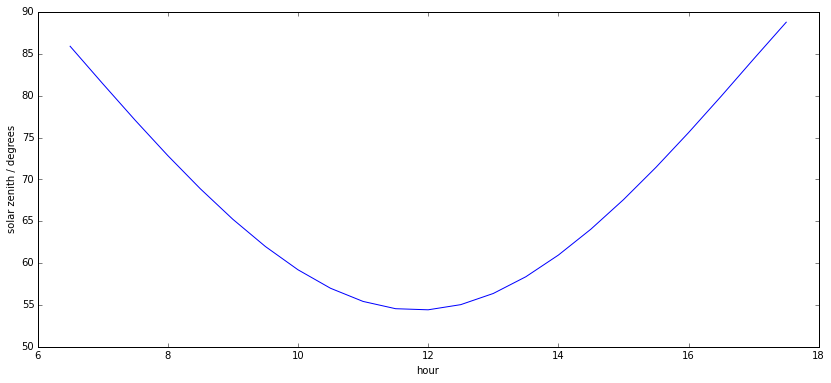

In [43]:
# just for interest, let's plot this:

import pylab as plt
%pylab inline

filename = 'files/data/elevation.dat'
fp = open(filename,"r")

hours = []
zeniths = []

for i in fp.readlines():
    data = i.split()
    time = [float(i) for i in data[1].split(':')]
    hour = time[0] + time[1]/60. + time[2]/(60.*60)
    zenith = 90. - float(data[2])
    if zenith <= 90.:
        hours.append(hour)
        zeniths.append(zenith)
fp.close()

# plotting
fig = plt.figure(figsize=(14, 6))
plt.plot(hours,zeniths)
plt.xlabel('hour')
plt.ylabel('solar zenith / degrees')

## A2.8 Reading Files from a URL

In the main exercises, you have been advised to download a file and read it using the normal file `open` commands.

If a file is available as a [URL](http://en.wikipedia.org/wiki/Uniform_resource_locator), you can conveniently use the `urllib2` module in Python to access the file directly.

So, in the case of the precipitation data in an earlier exercise, we could hhave directly read the data with:

In [44]:
import urllib.request, urllib.error, urllib.parse

#as files
url = "http://www.metoffice.gov.uk/hadobs/hadukp/data/monthly/HadSEEP_monthly_qc.txt"

req = urllib.request.Request ( url )
raw_data = urllib.request.urlopen(req).readlines()

print(raw_data[:6])

['Monthly Southeast England precipitation (mm). Daily automated values used after 1996.\n', 'Wigley & Jones (J.Climatol.,1987), Gregory et al. (Int.J.Clim.,1991)\n', 'Jones & Conway (Int.J.Climatol.,1997), Alexander & Jones (ASL,2001). Values may change after QC.\n', 'YEAR   JAN   FEB   MAR   APR   MAY   JUN   JUL   AUG   SEP   OCT   NOV   DEC   ANN\n', ' 1873  87.1  50.4  52.9  19.9  41.1  63.6  53.2  56.4  62.0  86.0  59.4  15.7  647.7\n', ' 1874  46.8  44.9  15.8  48.4  24.1  49.9  28.3  43.6  79.4  96.1  63.9  52.3  593.5\n']


## A2.9 Advanced dictionaries

They are particularly useful when you want to build clear data structures, e.g. in loading a dataset such as [`files/data/HadSEEP_monthly_qc.txt`](files/data/HadSEEP_monthly_qc.txt).

First, let's read the data from this file into the lists `label` and `rdata`, where `rdata[0]` will be the first column in the file, `rdata[1]` the second column etc.


In [45]:
fp = open('files/data/HadSEEP_monthly_qc.txt','r')
sdata = fp.readlines()
fp.close()

labels = sdata[3].split()
data = [i.split() for i in sdata[4:]]
j = 0
rdata = [[float(data[i][j]) \
         for i in range(len(data))]\
         for j in range(len(data[0]))]

print(rdata[0])

[1873.0, 1874.0, 1875.0, 1876.0, 1877.0, 1878.0, 1879.0, 1880.0, 1881.0, 1882.0, 1883.0, 1884.0, 1885.0, 1886.0, 1887.0, 1888.0, 1889.0, 1890.0, 1891.0, 1892.0, 1893.0, 1894.0, 1895.0, 1896.0, 1897.0, 1898.0, 1899.0, 1900.0, 1901.0, 1902.0, 1903.0, 1904.0, 1905.0, 1906.0, 1907.0, 1908.0, 1909.0, 1910.0, 1911.0, 1912.0, 1913.0, 1914.0, 1915.0, 1916.0, 1917.0, 1918.0, 1919.0, 1920.0, 1921.0, 1922.0, 1923.0, 1924.0, 1925.0, 1926.0, 1927.0, 1928.0, 1929.0, 1930.0, 1931.0, 1932.0, 1933.0, 1934.0, 1935.0, 1936.0, 1937.0, 1938.0, 1939.0, 1940.0, 1941.0, 1942.0, 1943.0, 1944.0, 1945.0, 1946.0, 1947.0, 1948.0, 1949.0, 1950.0, 1951.0, 1952.0, 1953.0, 1954.0, 1955.0, 1956.0, 1957.0, 1958.0, 1959.0, 1960.0, 1961.0, 1962.0, 1963.0, 1964.0, 1965.0, 1966.0, 1967.0, 1968.0, 1969.0, 1970.0, 1971.0, 1972.0, 1973.0, 1974.0, 1975.0, 1976.0, 1977.0, 1978.0, 1979.0, 1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0,

We can of course just remember that the first column is 'year', the second column data for 'JAN' etc., but we would have a much better organised dataset if we put it in a dictionary.

One way to do this would be:

In [46]:
# set up a 
dataset = {}
for i,k in enumerate(labels):
    dataset[k] = rdata[i]

and we could now refer to the 'year' data as:

In [47]:
print(dataset['YEAR'])

[1873.0, 1874.0, 1875.0, 1876.0, 1877.0, 1878.0, 1879.0, 1880.0, 1881.0, 1882.0, 1883.0, 1884.0, 1885.0, 1886.0, 1887.0, 1888.0, 1889.0, 1890.0, 1891.0, 1892.0, 1893.0, 1894.0, 1895.0, 1896.0, 1897.0, 1898.0, 1899.0, 1900.0, 1901.0, 1902.0, 1903.0, 1904.0, 1905.0, 1906.0, 1907.0, 1908.0, 1909.0, 1910.0, 1911.0, 1912.0, 1913.0, 1914.0, 1915.0, 1916.0, 1917.0, 1918.0, 1919.0, 1920.0, 1921.0, 1922.0, 1923.0, 1924.0, 1925.0, 1926.0, 1927.0, 1928.0, 1929.0, 1930.0, 1931.0, 1932.0, 1933.0, 1934.0, 1935.0, 1936.0, 1937.0, 1938.0, 1939.0, 1940.0, 1941.0, 1942.0, 1943.0, 1944.0, 1945.0, 1946.0, 1947.0, 1948.0, 1949.0, 1950.0, 1951.0, 1952.0, 1953.0, 1954.0, 1955.0, 1956.0, 1957.0, 1958.0, 1959.0, 1960.0, 1961.0, 1962.0, 1963.0, 1964.0, 1965.0, 1966.0, 1967.0, 1968.0, 1969.0, 1970.0, 1971.0, 1972.0, 1973.0, 1974.0, 1975.0, 1976.0, 1977.0, 1978.0, 1979.0, 1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0,

A simper and more Pythonic way is to use `zip`:

In [48]:
dataset = dict(list(zip(labels,rdata)))

In [49]:
print(dataset['YEAR'])

[1873.0, 1874.0, 1875.0, 1876.0, 1877.0, 1878.0, 1879.0, 1880.0, 1881.0, 1882.0, 1883.0, 1884.0, 1885.0, 1886.0, 1887.0, 1888.0, 1889.0, 1890.0, 1891.0, 1892.0, 1893.0, 1894.0, 1895.0, 1896.0, 1897.0, 1898.0, 1899.0, 1900.0, 1901.0, 1902.0, 1903.0, 1904.0, 1905.0, 1906.0, 1907.0, 1908.0, 1909.0, 1910.0, 1911.0, 1912.0, 1913.0, 1914.0, 1915.0, 1916.0, 1917.0, 1918.0, 1919.0, 1920.0, 1921.0, 1922.0, 1923.0, 1924.0, 1925.0, 1926.0, 1927.0, 1928.0, 1929.0, 1930.0, 1931.0, 1932.0, 1933.0, 1934.0, 1935.0, 1936.0, 1937.0, 1938.0, 1939.0, 1940.0, 1941.0, 1942.0, 1943.0, 1944.0, 1945.0, 1946.0, 1947.0, 1948.0, 1949.0, 1950.0, 1951.0, 1952.0, 1953.0, 1954.0, 1955.0, 1956.0, 1957.0, 1958.0, 1959.0, 1960.0, 1961.0, 1962.0, 1963.0, 1964.0, 1965.0, 1966.0, 1967.0, 1968.0, 1969.0, 1970.0, 1971.0, 1972.0, 1973.0, 1974.0, 1975.0, 1976.0, 1977.0, 1978.0, 1979.0, 1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0,

So, e.g. plotting data sets would be clear using the dictionary:

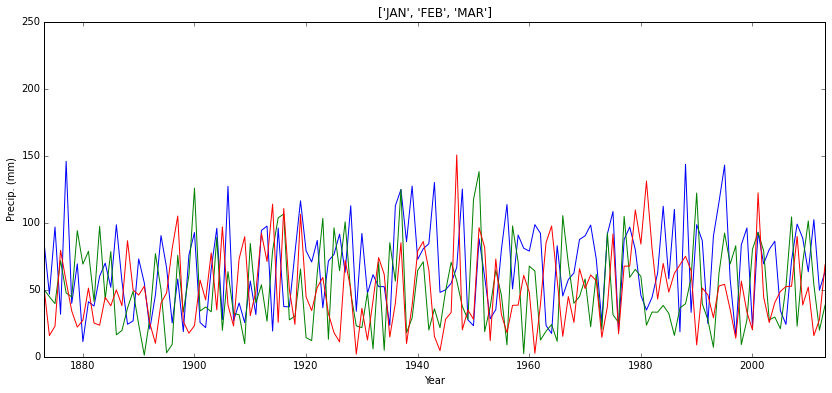

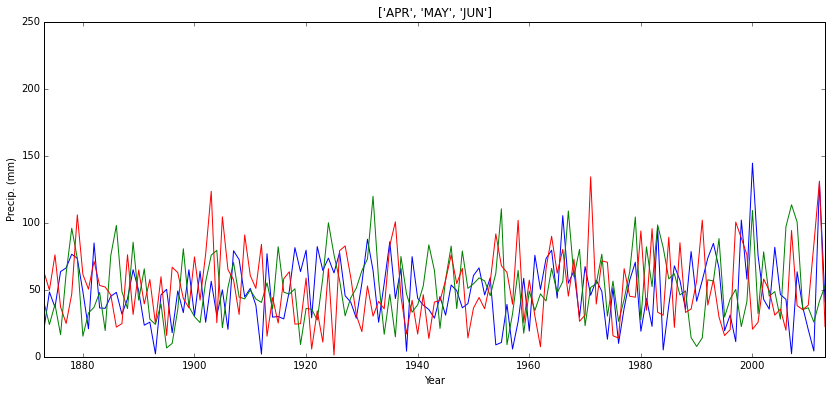

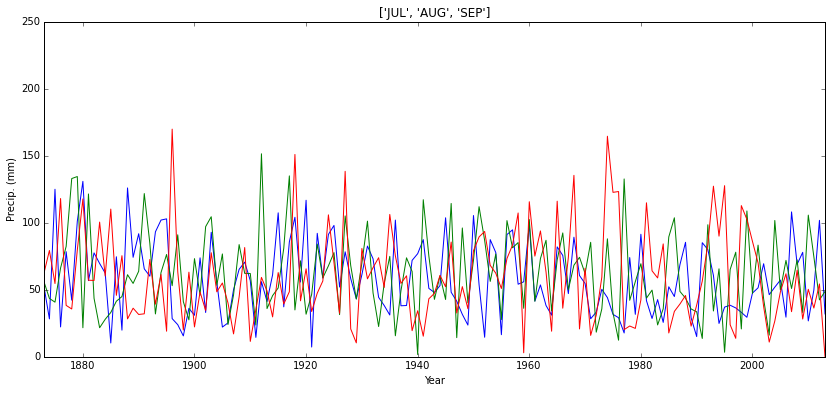

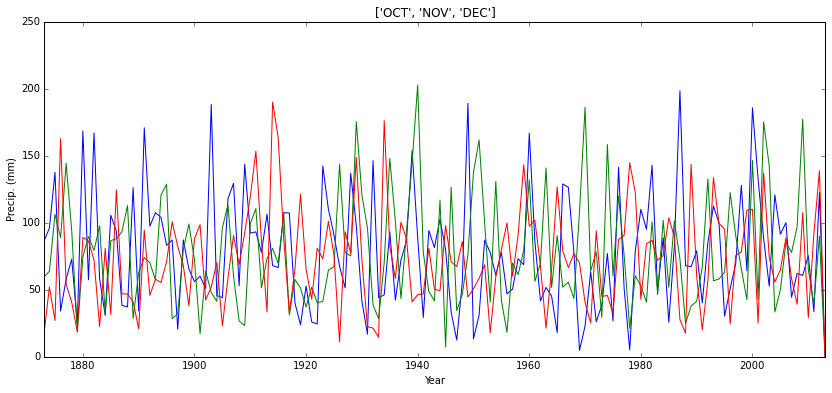

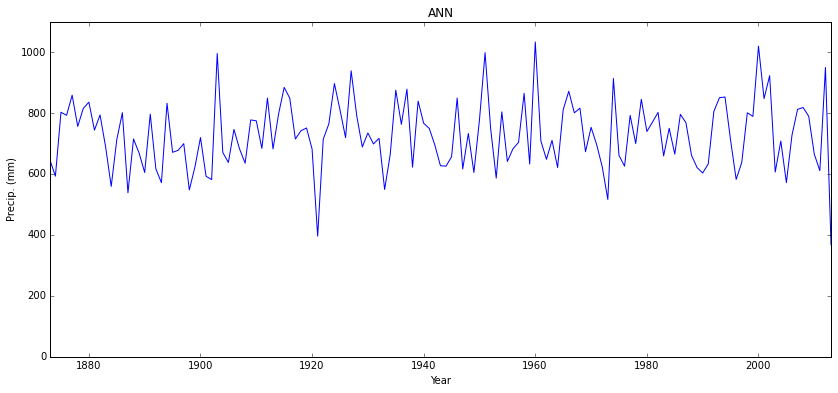

In [50]:
import pylab as plt
%pylab inline
for i,JFM in enumerate([['JAN','FEB','MAR'],['APR','MAY','JUN'],\
              ['JUL','AUG','SEP'],['OCT','NOV','DEC']]):
    plt.figure(i,figsize=(14, 6))
    plt.xlabel('Year')
    plt.ylabel('Precip. (mm)')
    for month in JFM:
        plt.ylim(0,250)
        plt.xlim(dataset['YEAR'][0],dataset['YEAR'][-1])
        plt.title(str(JFM))
        plt.plot(dataset['YEAR'],dataset[month])

plt.figure(i+1,figsize=(14, 6))
plt.xlabel('Year')
plt.ylabel('Precip. (mm)')
plt.title('ANN')
plt.ylim(0,1100)
plt.xlim(dataset['YEAR'][0],dataset['YEAR'][-1])
plt.plot(dataset['YEAR'],dataset['ANN'])

## Excercise

In this example, we want to read all data from the Heathrow Met data file `files/data/heathrowdata.txt` and plot each data field.

In doing this, we want to store the data in a dictionary, as this is a convenient way of access the different data fields.

At the heart of this example is the statement

```python
    dict(zip(labels,rdata))
```

This is a very useful combination in Python as it allows us to generate a dictionary with the keys specified by `labels` and the values `rdata`.

A few things that make this a bit more complicated are:

1. When we read the data line by line from the file, we have it stored as data[line][sample], i.e. each data[line] is the data for that line. When we want to load it into the dictionary, we want the data the other way around. This is a bit tricky with lists, and we have to use the following, which is a general statement, so you can use it for similar rotations, but its a bit dense.
```python
    rdata = [[data[j][i] for j in xrange(len(data))] for i in xrange(len(data[0]))]
```
2. When parsing the file, we have to deal with some awkward aspects, such as the presence of `#` symbols here and there and the fact that `'---'` is used to indicate no data. Here, we replace these awkward fields with more convenient numerical values (that won't break the conversion to `float`), or get rid of them as appropriate (using `replace()` on the strings).
3. When we come to plot the data, we have to confront the fact that we used `-999` to indicate no data, and have to filter these values out before plotting. This is easy enough to do in a listcomp for the `y` values by using a conditional statement:
```python
    y = [i for i in items[label] if i != -999]
```
But for the x values, we have to filter these based on a test with the `y` values ... and so we use a more complex statement:
```python
    x = [time[j] for j,i in enumerate(items[label]) if i != -999]
```
4. Finally, lists are not very convenient for numerical operations on the lists ... we can't simply add [0.1,0.2] to [3.0,4.0] to get [3.1,4.2], because `+` is a concatenation operator for lists. Instead, we have to loop over all of the items in the lists:
```python
time = [items['year'][i] + items['month'][i]/12. for i in xrange(len(items['year']))]
```
We will see next time that there are more convenient modules for doing this sort of thing, but it's of value to know how you can do it if you only have lists.

One final comment is that we have made extensive use of listcomps here, which make the code more compact but may be more difficult for people just starting coding to follow.
    

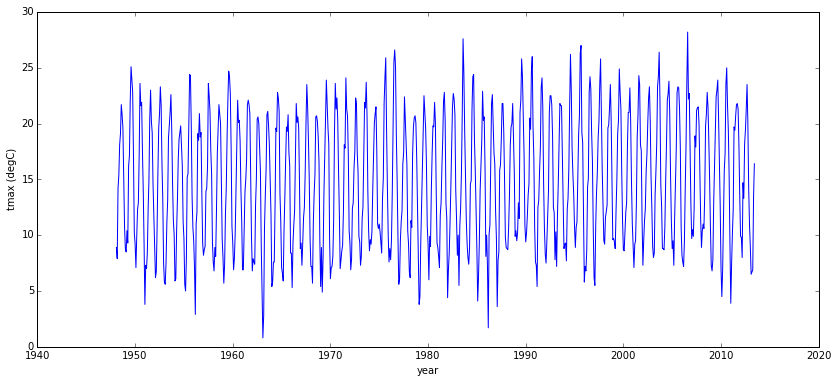

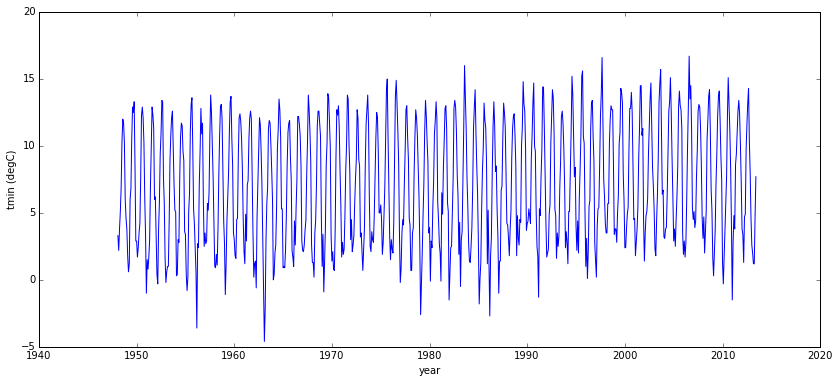

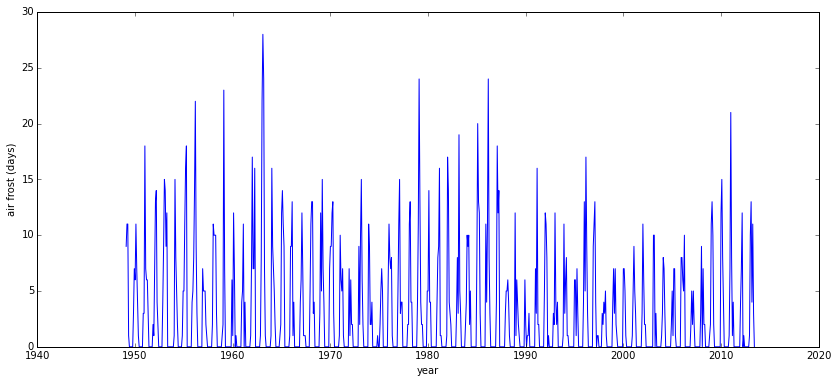

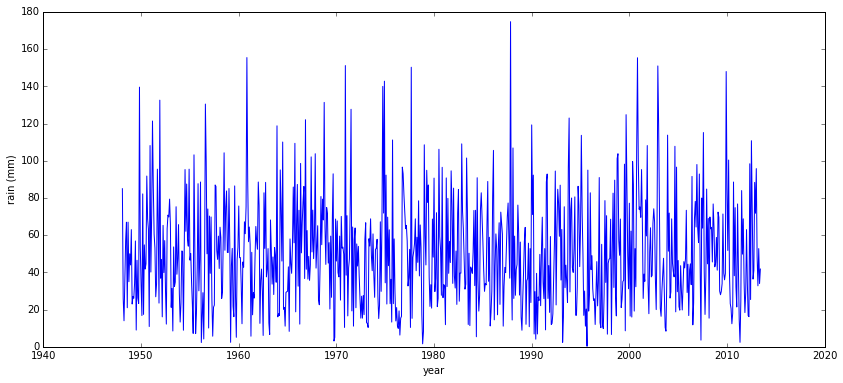

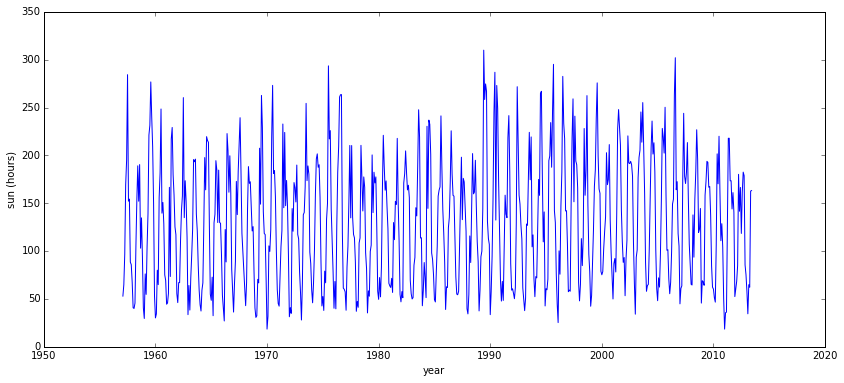

In [51]:
# Read files/data/heathrowdata.txt as above into data as float
# doing some clever things to deal with file markers
# i.e. where it says #  Provisional or # we will not worry about
# that for the moment
# where it has fillers, ---, replace by -999

fp = open('files/data/heathrowdata.txt','r')
ldata = [i.replace('---','-999').replace('#  Provisional','').replace('#','').split() \
                     for i in fp.readlines()[7:]]
data = [[float(k) for k in j] for j in ldata]
fp.close()

# The reading by line is a bit inconvenient, so rotate the 
# dataset
rdata = [[data[j][i] for j in range(len(data))] for i in range(len(data[0]))]

# set some labels for each column
labels = ['year','month','tmax (degC)','tmin (degC)',\
          'air frost (days)','rain (mm)','sun (hours)'] 

# generate a dictionary with the labels as keys
items = dict(list(zip(labels,rdata)))

import pylab as plt
# its quite difficult to add arrays
# so we have to loop over each item
time = [items['year'][i] + items['month'][i]/12. for i in range(len(items['year']))]

for i,label in enumerate(labels[2:]):
    plt.figure(i,figsize=(14, 6))
    plt.xlabel('year')
    plt.ylabel(label)
    # filter out the -999 values
    x = [time[j] for j,i in enumerate(items[label]) if i != -999]
    y = [i for i in items[label] if i != -999]
    plt.plot(x,y)

## A2.9 Listcomp and generator expressions

In the main class notes, we used expressions and loops of the form:

In [2]:
data = "1964 1220 1974 2470 1984 2706 1994 4812 2004 2707"
sdata = data.split()

for i in range(0,len(sdata),2):
    print(' '.join(sdata[i:i+2]))

1964 1220
1974 2470
1984 2706
1994 4812
2004 2707


to do repeated actions by looping the variable `i` over some array of integers.

That is a perfectly fine way to pull these data out of a string, but it's not very ['Pythonic'](http://python.net/~goodger/projects/pycon/2007/idiomatic/handout.html) (it does'nt make best use of some of the elegant features of this language).

Better in this sense is what are known as [listcomps](http://python.net/~goodger/projects/pycon/2007/idiomatic/handout.html#list-comprehensions) (list comprehensions).

With a listcomp, you define a list (enclosed in `[`, `]`), with two or three terms. The first term is some function `fn(item)`. The second is a for statement. The third, if present, is a conditional (`if`) statement. 

For example:

In [3]:
fdata = [int(s) for s in data.split()]

print(fdata)

[1964, 1220, 1974, 2470, 1984, 2706, 1994, 4812, 2004, 2707]


This generates a list. Within this list, we iterate over the loop `for s in data.split()`, and enter the result of the function `int(s)`.

So this example is directly equivalent to:

In [4]:
data = "1964 1220 1974 2470 1984 2706 1994 4812 2004 2707"

fdata = []
for s in data.split():
    fdata.append(int(s))
        
print(fdata)

[1964, 1220, 1974, 2470, 1984, 2706, 1994, 4812, 2004, 2707]


You will very commonly use listcomps of this nature when performing some function over elements in a list where you have to perform the function on each element at a time.

In [5]:
data = "1964 1220 1974 2470 1984 2706 1994 4812 2004 2707"
fdata = [int(s) for s in data.split()]

# use slicing to separate the odd
# and even data
years     = fdata[0::2]
emissions = fdata[1::2]

print(years)
print(emissions)

[1964, 1974, 1984, 1994, 2004]
[1220, 2470, 2706, 4812, 2707]


Listcomps can be very convenient, as they are a compact way of specifying a loop (with a conditonal statement oif required).

Don't use listcomps if they obscure the meaning of what you are doing though.


A listcomp generates everything in the list, then returns the list.

Sometimes, you only need one element at a time (e.g. within a loop). In such cases, it is better to use generator expressions.

These look much like listcomps but use `()` rather than `[]`

In [7]:
fdata = (int(s) for s in data.split())
print('fdata is',fdata)

for i in fdata:
    print(i)

fdata is <generator object <genexpr> at 0x7fc81da021e0>
1964
1220
1974
2470
1984
2706
1994
4812
2004
2707


but only return one item at a time, on demand in the loop.